## Accessing files from Python

### Linux and Windows FileSystem

The main and most striking difference is that you have to use two different separators for the directory names:


* `\` in **Windows**



* `/` in **Unix/Linux.**


Its very important when writing programs in Python. **Recall the very specific role played by the `\` inside Python strings.**

<div>
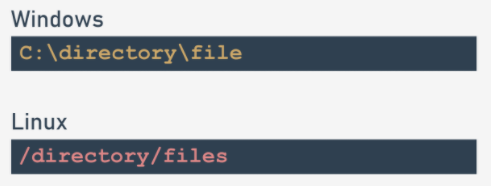
</div>

In [3]:
name = "/dir/file" # Linux

In [2]:
name = "\\dir\\file"  # Windows

Any program written in Python (and not only in Python, because that convention applies to virtually all programming languages) **does not communicate with the files directly**


But **through some abstract entities** that are named differently in different languages or environments - the most-used terms are **`handles or streams`**

To connect (bind) the stream with the file, it's necessary to perform an explicit operation.

* The operation of `connecting` the stream with a file is called opening the file.


* The operation of `disconnecting` this link is named closing the file.



There are `2 basic` operations performed on the stream:


* `read` from the stream: the portions of the data are retrieved from the file and placed in a memory area managed by the program (e.g., a variable)


* `write` to the stream: the portions of the data from the memory (e.g., a variable) are transferred to the file.



There are `3 basic modes` used to **open** the stream:

* `Read mode`: Allows read operations only;
    + Trying to write to the stream will cause an exception
    + `UnsupportedOperation`, which inherits `OSError` and `ValueError`, and comes from the `io module`)
    
    
    
* `Write mode`:Allows write operations only;
    + Attempting to read the stream will cause the exception mentioned above
    
    
    
* `Update mode`: Allows both writes and reads

**The stream behaves almost like a tape recorder.**


### File Handling in Python

**Python assumes that every file is hidden behind an object of an adequate class.**


* An **object of an adequate class is created when you `open the file` and `annihilate it at the time of closing`.**



* You **never use constructors to bring these objects to life**. The only way you obtain them is to **invoke the function named `open()`.**


* If you want to get rid of the object, you invoke the method named `close()`.

<div>
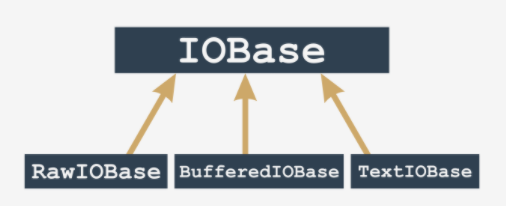
</div>

#### Text and Binary Streams




**Text Streams**

* They are structured in lines; that is, they **contain typographical characters (letters, digits, punctuation, etc.)**


* Arranged in rows (lines), as seen with the naked eye when you look at the contents of the file in the editor.


**Binary Streams**

* `Don't contain text` but a **sequence of bytes of any value**. This sequence can be, for example, an executable program, an image, an audio or a video clip, a database file, etc.


* It **reads and writes relate to portions of data of any size**. Hence the data is read/written **byte by byte, or block by block**, where the `size of the block` usually ranges from one to an `arbitrarily chosen value`.







#### End of Line in Linux and Windows




**Linux:** marked by a single character named `LF` (ASCII code 10) designated in **Python programs as `\n`.**



**Windows:**  marked by a pair of characters, `CR and LF` (ASCII codes 13 and 10) which can be encoded as **`\r\n`.**


During `reading/writing` of lines from/to the associated file, **nothing special occurs in the Unix environment**, but when the same operations are performed **in the Windows environment, a process called a translation of newline characters occurs**: when you read a line from the file, **every pair of `\r\n` characters is replaced with a single `\n` character, and vice versa**; during write operations, every \n character is replaced with a pair of \r\n characters;



**`Stream is open`** and it's advised to do so, its contents are **taken as-is, without any** conversion - no bytes are added or omitted.

In [6]:
stream = open(file, mode = 'r', encoding = None)

<div>
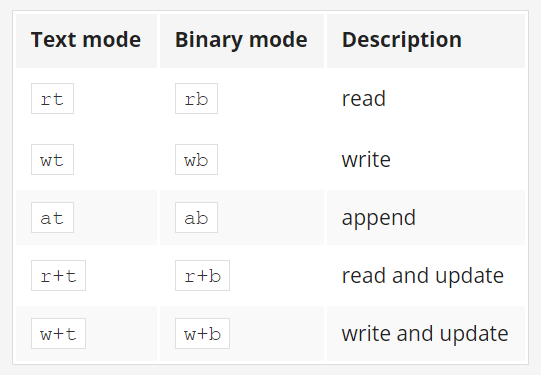
</div>

You can also `open a file for its exclusive creation`. You can do this using the **`x`** open mode. If the file already exists, the open() function will raise an exception.

<div>
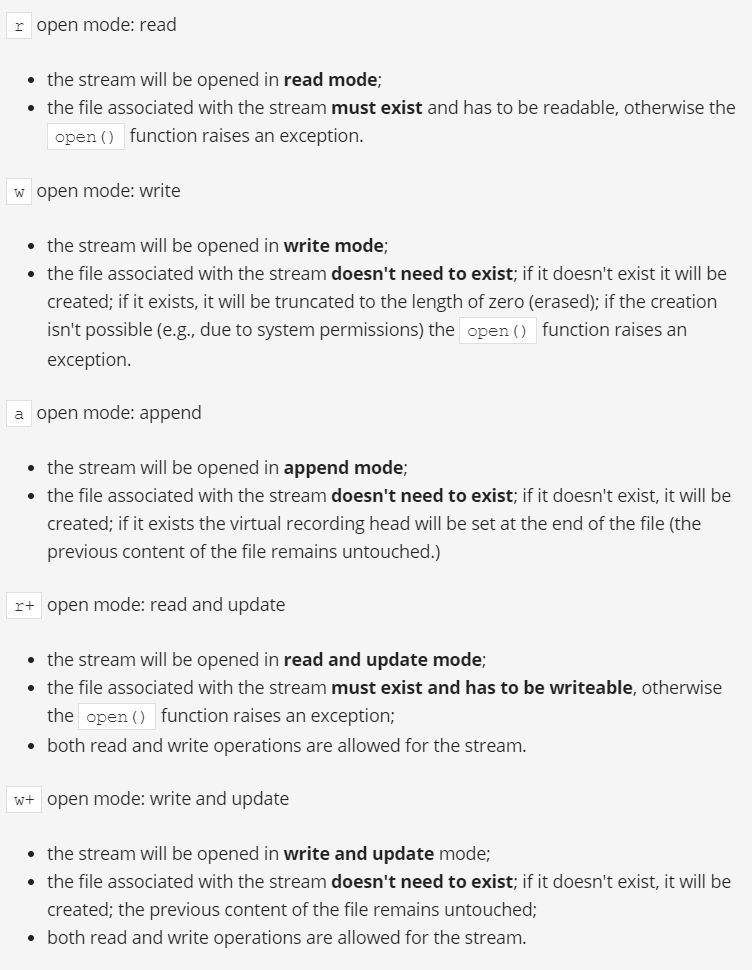
</div>

### Pre-Opened Streams

When our program starts, the **3 streams are already opened** and don't require any extra preparations. 

<div>
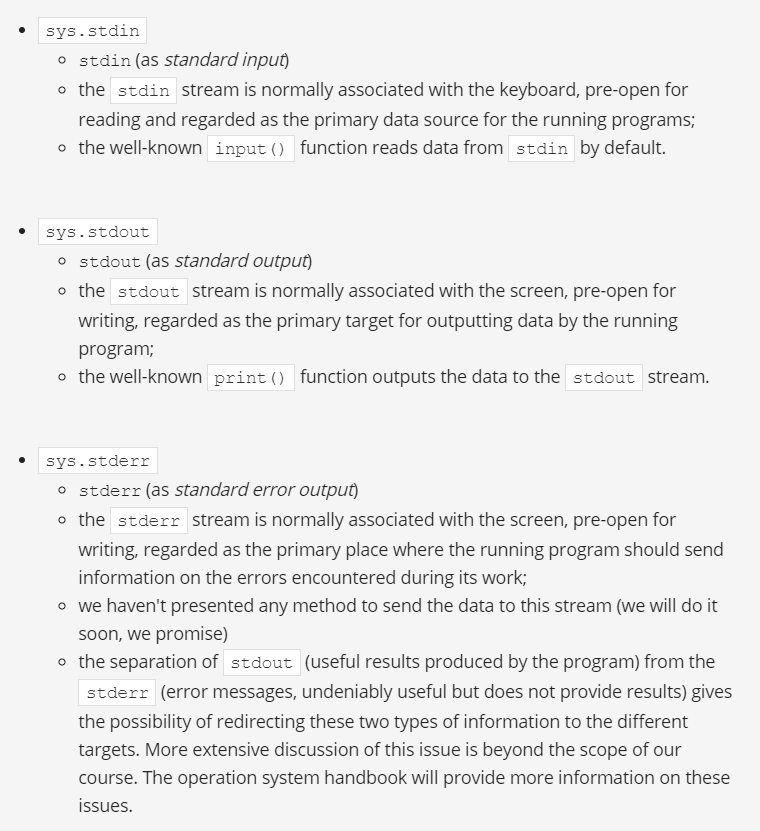
</div>

### ClosingStreams

`stream.close()`

* Expects **exactly no arguments**
* Stream **doesn't need to be opened**
 * `close()` returns **nothing** but raises `IOError` exception in case of error
 
If the stream was opened for writing and then a series of write operations were performed, **it may happen that the data sent to the stream has not been transferred to the physical device yet (due to mechanism called `caching` or `buffering`).

Since the closing of the stream forces the buffers to flush them, it may be that the flushes fail and therefore the close() fails too.

#### Diagnosing Stream Problems

The `IOError` object is equipped with a **property named `errno`**

In [7]:
try:
    # Some stream operations.
except IOError as exc:
    print(exc.errno)

IndentationError: expected an indented block (<ipython-input-7-c4c9ac57d5d9>, line 3)

<div>
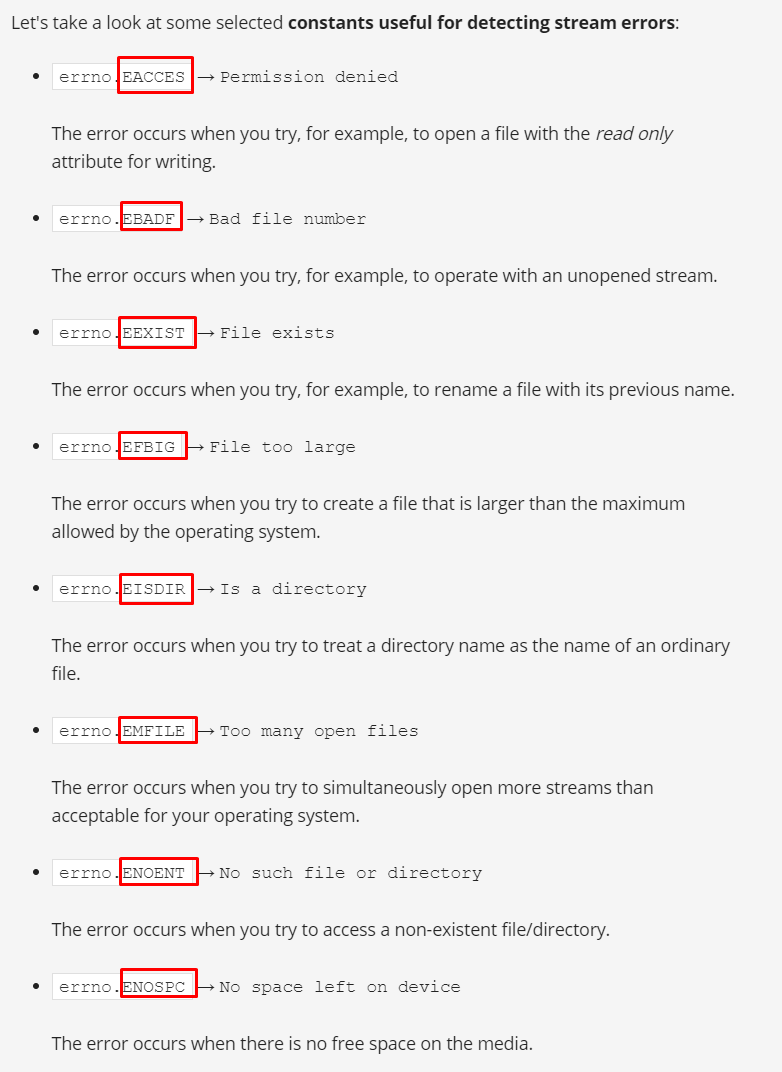
</div>

#### `strerror()`

It comes from the **os module** and expects just **one argument - an error number.**

In [8]:
from os import strerror

try:
    s = open("c:/users/user/Desktop/file.txt", "rt")
    # Actual processing goes here.
    s.close()
except Exception as exc:
    print("The file could not be opened:", strerror(exc.errno))



The file could not be opened: No such file or directory


In [9]:
import errno

try:
    s = open("c:/users/user/Desktop/file.txt", "rt")
    # Actual processing goes here.
    s.close()
except Exception as exc:
    if exc.errno == errno.ENOENT:
        print("The file doesn't exist.")
    elif exc.errno == errno.EMFILE:
        print("You've opened too many files.")
    else:
        print("The error number is:", exc.errno)


The file doesn't exist.
